In [37]:
#import bibliotek i danych


import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('AB_NYC_2019.csv')
print(df)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [2]:
#summary information about loaded data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [103]:
#checking if missing values exist

df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [99]:
#removing missing data

df.fillna({'name': 'N/A'}, inplace=True)
df.fillna({'reviews_per_month': 0}, inplace=True)
#removing unnecessary columns for further analysis
df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)






KeyError: "['id', 'host_name', 'last_review'] not found in axis"

In [79]:
#summary statistics

df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,128.946293,5.761468,16.956151,0.969240,1.802700,112.781327
std,7.861097e+07,0.054530,0.046157,71.558358,8.148526,23.163086,1.193266,1.355083,131.622289
min,2.438000e+03,40.499790,-74.244420,49.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.060000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,269.000000,28.000000,70.000000,3.630000,5.000000,365.000000


In [40]:
#Changing data types
#neighbourhood_group, neighbourhood, room_type are categories. It has to be change from object to category.

df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')


In [80]:
df.dtypes

name                                object
host_id                              int64
neighbourhood_group               category
neighbourhood                     category
latitude                           float64
longitude                          float64
room_type                         category
price                              float64
minimum_nights                     float64
number_of_reviews                  float64
reviews_per_month                  float64
calculated_host_listings_count     float64
availability_365                     int64
dtype: object

In [14]:
df.duplicated().sum()

0

In [27]:
df_new = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']]
     
print(df_new)

       price  minimum_nights  number_of_reviews  reviews_per_month  \
0        149               1                  9               0.21   
1        225               1                 45               0.38   
2        150               3                  0               0.00   
3         89               1                270               4.64   
4         80              10                  9               0.10   
...      ...             ...                ...                ...   
48890     70               2                  0               0.00   
48891     40               4                  0               0.00   
48892    115              10                  0               0.00   
48893     55               1                  0               0.00   
48894     90               7                  0               0.00   

       calculated_host_listings_count  
0                                   6  
1                                   2  
2                                   1  

In [101]:
#Removing of outliers

for col in df_new:
    # Calculate z-score of the column
    a = df[col].quantile(0.10)
    b = df[col].quantile(0.90)
    df[col]=np.where(df[col]<a, a, df[col])
    df[col]=np.where(df[col]>b, b, df[col])
    print(col, c)
   

price [5. 2. 1. ... 1. 5. 1.]
minimum_nights [5. 2. 1. ... 1. 5. 1.]
number_of_reviews [5. 2. 1. ... 1. 5. 1.]
reviews_per_month [5. 2. 1. ... 1. 5. 1.]
calculated_host_listings_count [5. 2. 1. ... 1. 5. 1.]


In [102]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,"48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00"
mean,"67,620,010.65",40.73,-73.95,128.95,5.76,16.96,0.94,1.80,112.78
std,"78,610,967.03",0.05,0.05,71.56,8.15,23.16,1.12,1.36,131.62
min,"2,438.00",40.50,-74.24,49.00,1.00,0.00,0.00,1.00,0.00
25%,"7,822,033.00",40.69,-73.98,69.00,1.00,1.00,0.06,1.00,0.00
50%,"30,793,816.00",40.72,-73.96,106.00,3.00,5.00,0.37,1.00,45.00
75%,"107,434,423.00",40.76,-73.94,175.00,5.00,24.00,1.58,2.00,227.00
max,"274,321,313.00",40.91,-73.71,269.00,28.00,70.00,3.25,5.00,365.00


<Axes: xlabel='number_of_reviews'>

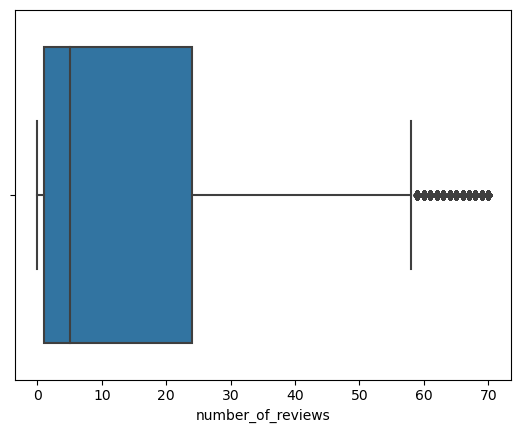

In [105]:
#checking of outliers presence by boxplot
  
sns.boxplot(x=df['number_of_reviews'])


<Axes: xlabel='reviews_per_month'>

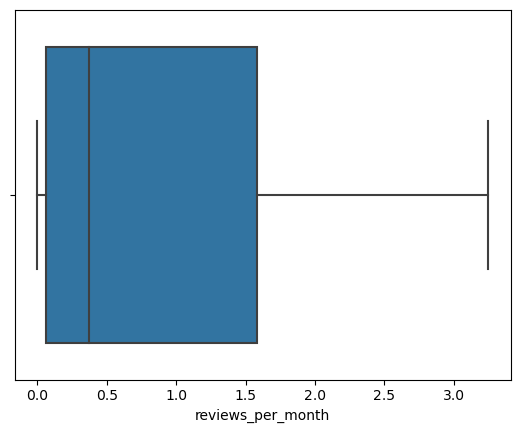

In [106]:
sns.boxplot(x=df['reviews_per_month'])

<Axes: xlabel='calculated_host_listings_count'>

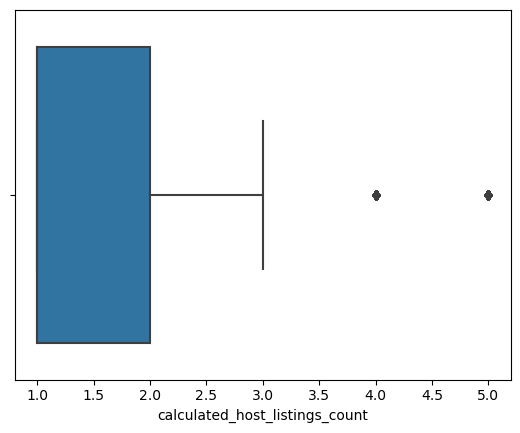

In [58]:
 sns.boxplot(x=df['calculated_host_listings_count'])

<Axes: xlabel='price'>

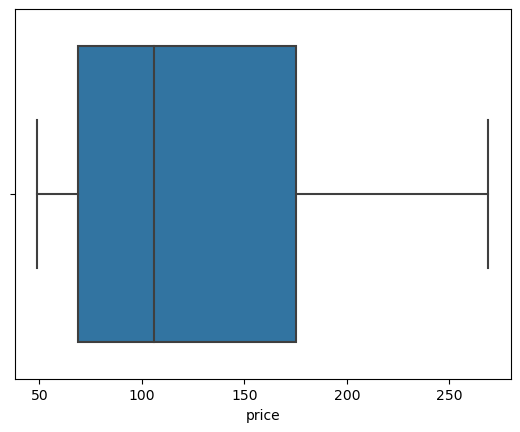

In [107]:
sns.boxplot(x=df['price'])

<Axes: xlabel='minimum_nights'>

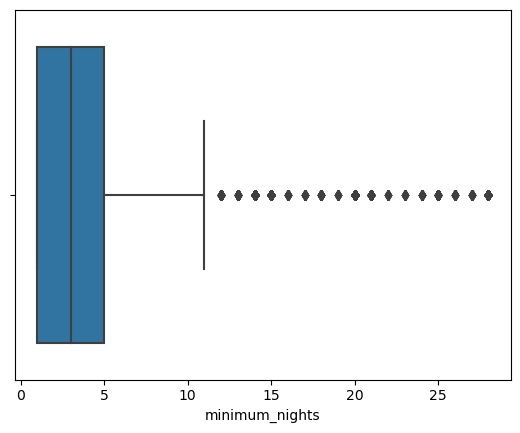

In [108]:
 sns.boxplot(x=df['minimum_nights'])

In [93]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,"48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00"
mean,"67,620,010.65",40.73,-73.95,128.95,5.76,16.96,0.97,1.80,112.78
std,"78,610,967.03",0.05,0.05,71.56,8.15,23.16,1.19,1.36,131.62
min,"2,438.00",40.50,-74.24,49.00,1.00,0.00,0.00,1.00,0.00
25%,"7,822,033.00",40.69,-73.98,69.00,1.00,1.00,0.06,1.00,0.00
50%,"30,793,816.00",40.72,-73.96,106.00,3.00,5.00,0.37,1.00,45.00
75%,"107,434,423.00",40.76,-73.94,175.00,5.00,24.00,1.58,2.00,227.00
max,"274,321,313.00",40.91,-73.71,269.00,28.00,70.00,3.63,5.00,365.00


In [91]:
#Rounding values of number_of_reviews, latitude, longitude to two decimal places 

df['number_of_reviews']=df['number_of_reviews'].round(2)
df['latitude'] = df['latitude'].round(2)
df['longitude'] = df[ 'longitude'].round(2)



In [92]:
#Displaying float values in DataFrame to two decimal places 
pd.options.display.float_format = "{:,.2f}".format

In [109]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,"48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00"
mean,"67,620,010.65",40.73,-73.95,128.95,5.76,16.96,0.94,1.80,112.78
std,"78,610,967.03",0.05,0.05,71.56,8.15,23.16,1.12,1.36,131.62
min,"2,438.00",40.50,-74.24,49.00,1.00,0.00,0.00,1.00,0.00
25%,"7,822,033.00",40.69,-73.98,69.00,1.00,1.00,0.06,1.00,0.00
50%,"30,793,816.00",40.72,-73.96,106.00,3.00,5.00,0.37,1.00,45.00
75%,"107,434,423.00",40.76,-73.94,175.00,5.00,24.00,1.58,2.00,227.00
max,"274,321,313.00",40.91,-73.71,269.00,28.00,70.00,3.25,5.00,365.00
